In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 각 경로 지정

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 분류 수 설정

In [3]:
NUM_CLASSES = 10

# 학습 데이터 로드

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# 모델 구축

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1180 (4.61 KB)
Trainable params: 1180 (4.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# 모델 체크포인트 콜백
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 조기 중단 콜백
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 훈련

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


44/59 [=====================>........] - ETA: 0s - loss: 2.3151 - accuracy: 0.1218
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
59/59 [==============================] - 2s 9ms/step - loss: 2.2983 - accuracy: 0.1297 - val_loss: 2.1902 - val_accuracy: 0.2068
Epoch 2/1000
41/59 [===================>..........] - ETA: 0s - loss: 2.1940 - accuracy: 0.1972

c:\Users\limha\anaconda3\envs\test\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
59/59 [==============================] - 0s 5ms/step - loss: 2.1769 - accuracy: 0.2113 - val_loss: 2.0563 - val_accuracy: 0.3632
Epoch 3/1000
41/59 [===================>..........] - ETA: 0s - loss: 2.0854 - accuracy: 0.2515
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
59/59 [==============================] - 0s 4ms/step - loss: 2.0574 - accuracy: 0.2644 - val_loss: 1.8781 - val_accuracy: 0.3872
Epoch 4/1000
50/59 [========================>.....] - ETA: 0s - loss: 1.9468 - accuracy: 0.2964
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
59/59 [==============================] - 0s 4ms/step - loss: 1.9358 - accuracy: 0.3015 - val_loss: 1.7194 - val_accuracy: 0.4376
Epoch 5/1000
50/59 [========================>.....] - ETA: 0s - loss: 1.8363 - accuracy: 0.3311
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
59/59 [=============

In [13]:
# 모델 평가
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

20/20 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.7488


In [14]:
# 저장된 모델 로드
model = tf.keras.models.load_model(model_save_path)

In [15]:
# 추론 테스트
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 109ms/step
[0.03052039 0.07062553 0.10246946 0.16307664 0.23917511 0.11688428
 0.07518747 0.11445007 0.00210396 0.08550712]
4


# 혼동 행렬

79/79 [==============================] - 0s 1ms/step


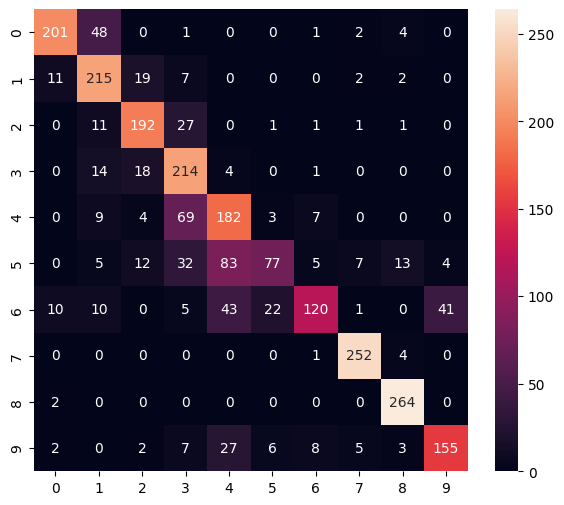

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       257
           1       0.69      0.84      0.76       256
           2       0.78      0.82      0.80       234
           3       0.59      0.85      0.70       251
           4       0.54      0.66      0.59       274
           5       0.71      0.32      0.44       238
           6       0.83      0.48      0.61       252
           7       0.93      0.98      0.96       257
           8       0.91      0.99      0.95       266
           9       0.78      0.72      0.75       215

    accuracy                           0.75      2500
   macro avg       0.76      0.75      0.74      2500
weighted avg       0.76      0.75      0.74      2500



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [17]:
# 가용 모델로 변환
model.save(model_save_path, include_optimizer=False)

c:\Users\limha\anaconda3\envs\test\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# 모델 변환 (양자화)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\limha\AppData\Local\Temp\tmp7y7n5x5z\assets


INFO:tensorflow:Assets written to: C:\Users\limha\AppData\Local\Temp\tmp7y7n5x5z\assets


6808

# 추론 테스트

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 입출력 텐서 취득
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 추론 실시
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.03052039 0.07062557 0.10246951 0.1630767  0.23917504 0.11688423
 0.07518746 0.11445006 0.00210396 0.08550709]
4
